In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.2)

%matplotlib inline

In [2]:
# file_path = '/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv'
ytb_df = pd.read_csv('dataset/Most popular 1000 Youtube videos.csv')
ytb_df

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015
...,...,...,...,...,...,...,...
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,"847,249","1,857",173,People & Blogs,2017
996,997,Ford Mustang Launch (street),"1,001,605","2,214",27,Autos & Vehicles,2008
997,998,Eminem is gay - The Interview,"2,718,939","43,492",0,Entertainment,2014
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,"52,890,986","850,425",0,Gaming,2017


In [3]:
print("View part of the dataset:\n")
ytb_df.head(10)

View part of the dataset:



,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015
5,6,JP Saxe - If the World Was Ending (Official Vi...,"76,834,495","804,353","21,195",Music,2019
6,7,JENNIE - ZEN (RUBY ALBUM MARCH 7),"8,306,465","1,261,577",NaN,Music,2025
7,8,"Polo G, Stunna 4 Vegas & NLE Choppa feat. Mike...","7,396,199","320,910","6,485",Music,2020
8,9,"Yovie Widianto, Lyodra, Tiara Andini, Ziva Mag...","13,894,905","452,087",NaN,Music,2023
9,10,JD Pantoja - 12•19 (Official Video),"7,010,732","1,027,392","34,185",Music,2020


In [4]:
print("Dataset Information:\n")
print("_"*35,"\n")
ytb_df.info()

Dataset Information:

___________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


# Convert numeric columns to int64 type

In [5]:
convert_column = ['Video views', 'Likes', 'Dislikes']
for col in convert_column:
    ytb_df[col] = ytb_df[col].astype('str').str.replace(',', '', regex=True)
    ytb_df[col] = pd.to_numeric(ytb_df[col], errors="coerce")


In [6]:
ytb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Video        1000 non-null   object 
 2   Video views  1000 non-null   int64  
 3   Likes        1000 non-null   int64  
 4   Dislikes     527 non-null    float64
 5   Category     982 non-null    object 
 6   published    1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [7]:
ytb_df.isnull().sum()

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

In [8]:
ytb_df["Dislikes"].fillna(ytb_df["Dislikes"].median(), inplace=True)
ytb_df["Category"].fillna(ytb_df["Category"].mode()[0], inplace=True)
ytb_df[505:525]

C:\Users\Soft\AppData\Local\Temp\ipykernel_25916\3181036984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytb_df["Dislikes"].fillna(ytb_df["Dislikes"].median(), inplace=True)
C:\Users\Soft\AppData\Local\Temp\ipykernel_25916\3181036984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,rank,Video,Video views,Likes,Dislikes,Category,published
505,506,Богатеи на Порше на митинге вкладчиков ТФБ,319543,5553,4557.0,News & Politics,2017
506,507,Vor dem Spiel Arminia vs Eintracht,604182,14665,1270.0,Sports,2017
507,508,Horse attacks alligator! Payne's prairie 4/12/17,2173396,2235,200.0,People & Blogs,2017
508,509,吳青峰 - （......催眠大師）（feat. Maîtrise Saint-Marc -...,729068,3681,477.0,Music,2022
509,510,Slime craft #diy #viralvideo try it 😍🔥,50430588,676600,477.0,Howto & Style,2024
510,511,High School Musical 3 - Can I Have This Dance ...,25576382,23880,1691.0,Music,2008
511,512,LOTR cast make fun of Orlando Bloom,2756627,12934,195.0,Film & Animation,2011
512,513,How To Survive In A Snow Cave ❄️ (@OutdoorBoys),30879051,1986344,477.0,People & Blogs,2024
513,514,"Лидер вежливых фермеров о концерне ""Покровский""",815205,5214,1997.0,People & Blogs,2017
514,515,Girl honks at ship,12100810,69506,3924.0,Autos & Vehicles,2012


In [9]:
ytb_df.describe()[['Video views', 'Likes', 'Dislikes']]

,Video views,Likes,Dislikes
count,1.000000e+03,1.000000e+03,1000.000000
mean,2.453435e+07,3.685451e+05,1449.486000
std,2.512570e+08,1.629418e+06,7064.938904
min,4.493900e+04,4.330000e+02,0.000000
25%,9.815690e+05,9.427250e+03,431.000000
50%,2.341652e+06,3.026200e+04,477.000000
75%,1.162638e+07,1.649858e+05,523.250000
max,6.547981e+09,4.442854e+07,178042.000000


==> The greater the difference between mean and median, the greater the probability of outliers

In [10]:
ytb_df['Category'].value_counts()

Category
Music                    449
People & Blogs           257
Entertainment             81
Comedy                    53
Sports                    35
Film & Animation          29
Gaming                    22
Autos & Vehicles          19
Pets & Animals            18
News & Politics           14
Education                  5
Science & Technology       5
Nonprofits & Activism      5
Travel & Events            4
Howto & Style              4
Name: count, dtype: int64

In [11]:
ytb_df.groupby('published').describe()['Likes']

,count,mean,std,min,25%,50%,75%,max
published,,,,,,,,
2005,2.0,4.184500e+03,3.471894e+02,3939.0,4061.75,4184.5,4307.25,4430.0
2006,26.0,2.795669e+04,3.610389e+04,1102.0,3650.00,10054.0,37373.50,125259.0
2007,29.0,2.178714e+04,5.838012e+04,734.0,2836.00,5982.0,15813.00,318037.0
2008,23.0,2.162757e+04,2.765580e+04,1267.0,3638.00,8025.0,26071.50,97649.0
2009,13.0,1.359762e+04,2.558369e+04,1532.0,3604.00,4766.0,9017.00,97009.0
2010,12.0,1.574475e+04,1.949926e+04,2810.0,4611.25,7693.5,15504.75,67527.0
2011,21.0,4.079171e+04,8.064258e+04,2923.0,6432.00,10975.0,29600.00,347772.0
2012,15.0,1.684867e+04,1.723161e+04,2442.0,6481.50,9278.0,21666.00,69506.0
2013,12.0,3.535033e+04,4.008447e+04,2624.0,9489.25,20089.0,41473.75,118797.0


# Which video has the most views? And what got the least views

In [12]:
print("Video with the highest view: ")
ytb_df[(ytb_df['Video views'] == ytb_df['Video views'].max())]

Video with the highest view: 


,rank,Video,Video views,Likes,Dislikes,Category,published
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6547981039,44428537,477.0,Music,2015


In [13]:
print("Video with least viewed: ")
ytb_df[(ytb_df['Video views'] == ytb_df['Video views'].min())]

Video with least viewed: 


,rank,Video,Video views,Likes,Dislikes,Category,published
778,779,Biometrids Decentralised and Anonymous ID by F...,44939,6760,81.0,Science & Technology,2018


# Which video got the most likes and the fewest likes?

In [14]:
print("Video with the highest likes: ")
ytb_df[(ytb_df['Likes'] == ytb_df['Likes'].max())]

Video with the highest likes: 


,rank,Video,Video views,Likes,Dislikes,Category,published
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6547981039,44428537,477.0,Music,2015


In [15]:
print("Video with the least likes: ")
ytb_df[(ytb_df['Likes'] == ytb_df['Likes'].min())]

Video with the least likes: 


,rank,Video,Video views,Likes,Dislikes,Category,published
777,778,Service station attempted robbery,346486,433,8.0,People & Blogs,2016


# Add a column for the total number of interactions for all videos

In [16]:
ytb_df['Total Interactions'] = ytb_df['Likes']+ytb_df['Dislikes']
ytb_df.sort_values('Total Interactions', ascending=False)

,rank,Video,Video views,Likes,Dislikes,Category,published,Total Interactions
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6547981039,44428537,477.0,Music,2015,44429014.0
60,61,"Pedro Capó, Farruko - Calma (Remix - Official ...",2964195014,13755637,477.0,Music,2018,13756114.0
136,137,"ROSALÍA, J Balvin - Con Altura (Official Video...",2209874850,9768545,477.0,Music,2019,9769022.0
31,32,"6ix9ine - FEFE ft. Nicki Minaj, Murda Beatz",1090948051,9015394,477.0,People & Blogs,2018,9015871.0
381,382,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",2356628623,6622023,477.0,Music,2019,6622500.0
...,...,...,...,...,...,...,...,...
10,11,Power Star Pawan Kalyan Special Surprise To Se...,96686,1007,82.0,Entertainment,2018,1089.0
981,982,DIESEL LOUIE,1605558,1035,52.0,Autos & Vehicles,2007,1087.0
674,675,Eddy Court - Scoop & Boolin,116227,1011,5.0,Music,2017,1016.0
799,800,Tra Tra Tra,2663550,734,212.0,Comedy,2007,946.0


# The relationship between the Total Interactions and views

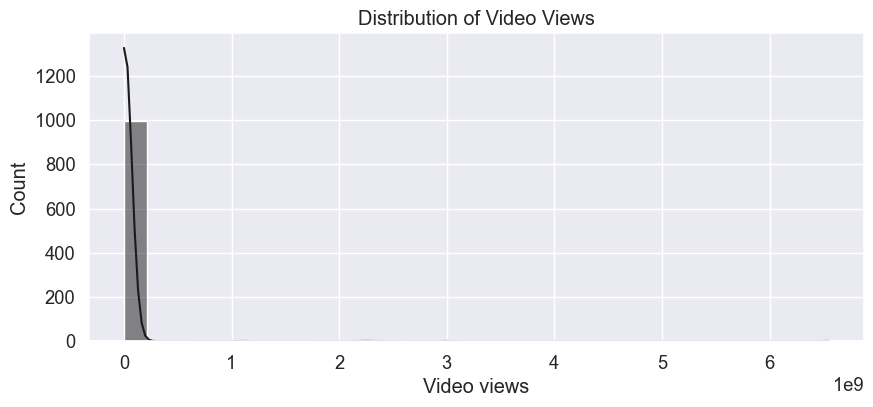

In [25]:
plt.figure(figsize=(10, 4))
sns.histplot(data=ytb_df, x='Video views', bins=30, kde=True, color='k')
plt.title('Distribution of Video Views')
plt.show()

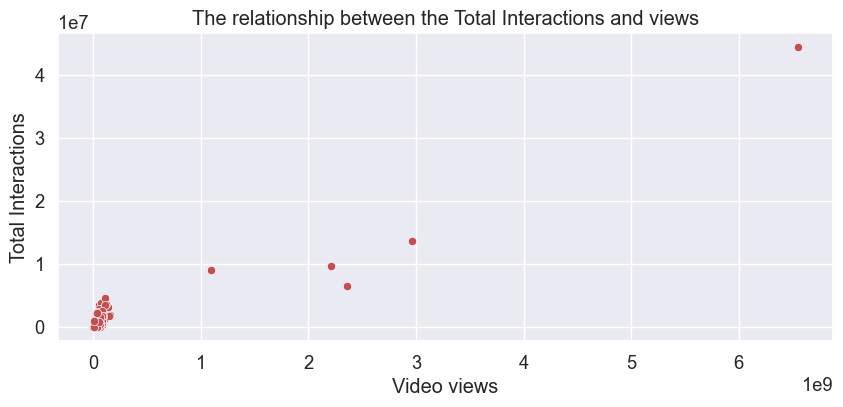

In [26]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=ytb_df, x='Video views', y='Total Interactions',color='r')
plt.title('The relationship between the Total Interactions and views')
plt.show()

# Note
There are outliers in the data that make the shapes very far away and we cannot understand the shapes and data 

# Remove outliers from data so that we can understand shapes 

In [18]:
q1 = ytb_df['Video views'].quantile(0.25)
q3 = ytb_df['Video views'].quantile(0.75)
iqr = q3 - q1 

min_whisker = q1 - 1.5*iqr
max_whisker = q3 + 1.5*iqr


In [19]:
ytb_df_without_outlier = ytb_df[(min_whisker < ytb_df['Video views']) & (ytb_df['Video views'] < max_whisker)]
# or using between function ==> ytb_df[(ytb_df['Video views'].between(min_whisker, max_whisker) 
ytb_df_without_outlier

,rank,Video,Video views,Likes,Dislikes,Category,published,Total Interactions
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859.0,Music,2017,19882.0
3,4,David Kushner - Daylight (Official Music Video),18558390,680732,477.0,Music,2023,681209.0
6,7,JENNIE - ZEN (RUBY ALBUM MARCH 7),8306465,1261577,477.0,Music,2025,1262054.0
7,8,"Polo G, Stunna 4 Vegas & NLE Choppa feat. Mike...",7396199,320910,6485.0,Music,2020,327395.0
8,9,"Yovie Widianto, Lyodra, Tiara Andini, Ziva Mag...",13894905,452087,477.0,Music,2023,452564.0
...,...,...,...,...,...,...,...,...
990,991,Please tell me I did a good job 🥹❤️ #art,14310073,801435,477.0,People & Blogs,2024,801912.0
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,847249,1857,173.0,People & Blogs,2017,2030.0
996,997,Ford Mustang Launch (street),1001605,2214,27.0,Autos & Vehicles,2008,2241.0
997,998,Eminem is gay - The Interview,2718939,43492,0.0,Entertainment,2014,43492.0


# Note
==> When observing, we find that the number of rows decreased, and this is evidence of the presence of outliers in the data of 91

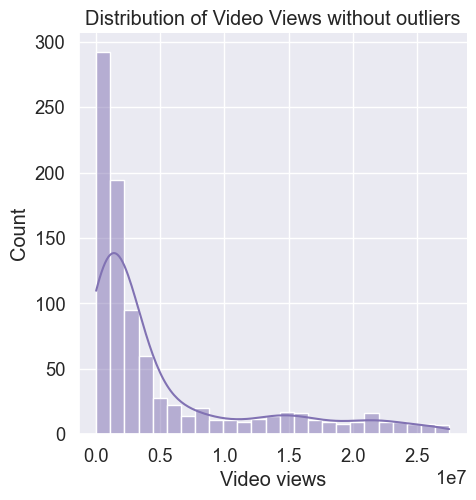

In [27]:
sns.displot(data=ytb_df_without_outlier, x='Video views', kde=True, color='m')
plt.title('Distribution of Video Views without outliers')
plt.show()

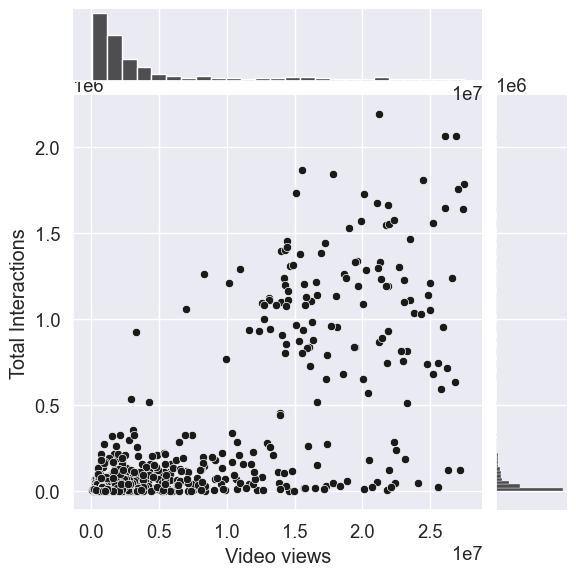

In [28]:
sns.jointplot(data=ytb_df_without_outlier, x='Video views', y='Total Interactions', color='k')
plt.show()

# Matrix of Correlation Between Numerical Features After Removing Outliers

In [46]:
ytb_df_without_outlier.select_dtypes(include='number').corr()

,rank,Video views,Likes,Dislikes,published,Total Interactions
rank,1.000000,0.179492,0.177713,0.043316,-0.164492,0.178454
Video views,0.179492,1.000000,0.760259,0.008923,0.150064,0.760546
Likes,0.177713,0.760259,1.000000,-0.019563,0.391555,0.999866
Dislikes,0.043316,0.008923,-0.019563,1.000000,-0.073398,-0.003218
published,-0.164492,0.150064,0.391555,-0.073398,1.000000,0.390428
Total Interactions,0.178454,0.760546,0.999866,-0.003218,0.390428,1.000000


# Note
There is a relationship between the number of interactions on the video and the number of views, where the more the number of interactions leads to an increase in views 

# What are the most popular categories in terms of views?

C:\Users\Soft\AppData\Local\Temp\ipykernel_25916\1973559880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_Video_views.index, y=sum_Video_views.values, palette='Set1')


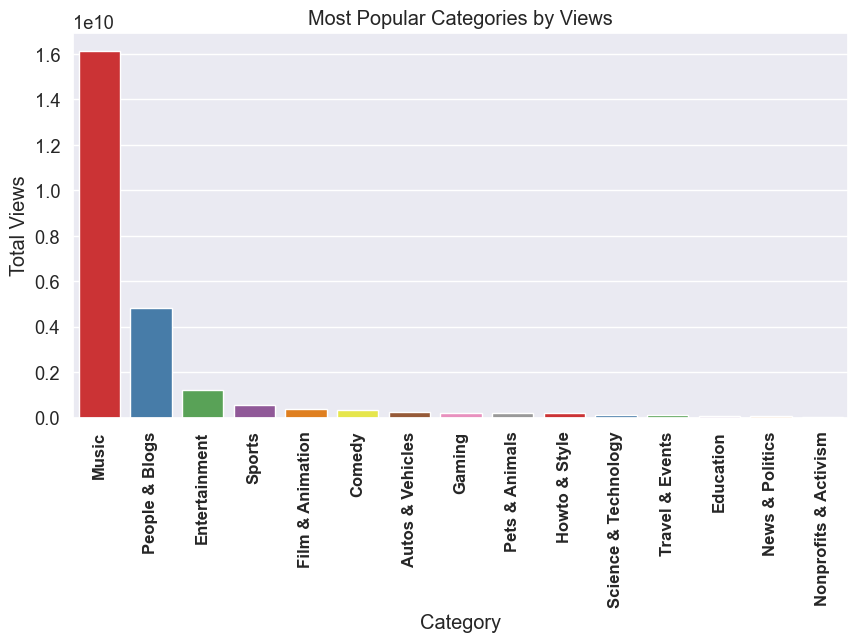

In [31]:
sum_Video_views = ytb_df.groupby('Category')['Video views'].sum().sort_values(ascending=False)

sns.barplot(x=sum_Video_views.index, y=sum_Video_views.values, palette='Set1')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')
plt.title("Most Popular Categories by Views")
plt.xlabel("Category")
plt.ylabel("Total Views")
plt.show()

# Which categories get the most likes?

C:\Users\Soft\AppData\Local\Temp\ipykernel_25916\3392576019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_Video_likes.index, y=sum_Video_likes.values, palette='Set1')


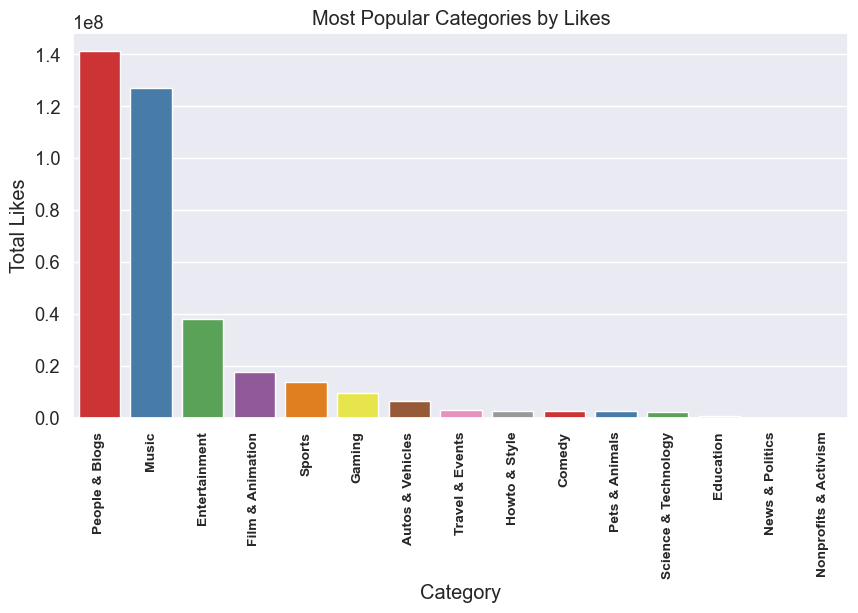

In [32]:
sum_Video_likes = ytb_df.groupby('Category')['Likes'].sum().sort_values(ascending=False)

sns.barplot(x=sum_Video_likes.index, y=sum_Video_likes.values, palette='Set1')
plt.xticks(rotation=90, fontsize=10, fontweight='bold')
plt.title("Most Popular Categories by Likes")
plt.xlabel("Category")
plt.ylabel("Total Likes")
plt.show()

# Categories that get the highest likes compared to views?

In [33]:
Category_stats = ytb_df.groupby('Category').sum()
Category_stats

,rank,Video,Video views,Likes,Dislikes,published,Total Interactions
Category,,,,,,,
Autos & Vehicles,11599,We asked you... What do you Chooze ?Suzuki Hay...,237126461,6482119,12556.0,38296,6494675.0
Comedy,29952,Jim Carrey THE FUNNIEST videoParks and Rec Com...,350001612,2711499,80453.0,106683,2791952.0
Education,3467,"Sir Nicholas Winton - BBC Programme ""That's Li...",57930140,914747,2172.0,10079,916919.0
Entertainment,49713,Power Star Pawan Kalyan Special Surprise To Se...,1202425848,38038916,93583.0,163290,38132499.0
Film & Animation,18919,Traditional Malaysian blowpipe maker shows how...,379368313,17658369,24491.0,58530,17682860.0
Gaming,11974,Bird learns how life worksClumsy DogRoblox Hac...,200871851,9503368,10304.0,44414,9513672.0
Howto & Style,1971,These Little Moments 🥹🤍 #toddler #siblings #cu...,180677174,2802331,3303.0,8084,2805634.0
Music,170654,Lil Nas X - Old Town Road (Official Movie) ft....,16133265230,127172142,617732.0,907514,127789874.0
News & Politics,7323,Вкладчикам Югры в Центробанке не радыParty Boy...,51745323,134638,13505.0,28193,148143.0


In [34]:
Category_stats['Like Ratio'] = (Category_stats['Likes']/Category_stats['Video views'])*100
Category_Like_Ratio = Category_stats.sort_values('Like Ratio',ascending=False)['Like Ratio']
Category_Like_Ratio

Category
Gaming                   4.731060
Film & Animation         4.654677
Travel & Events          3.398236
Entertainment            3.163514
People & Blogs           2.931374
Autos & Vehicles         2.733613
Sports                   2.521243
Science & Technology     2.361099
Education                1.579052
Howto & Style            1.551016
Pets & Animals           1.489470
Music                    0.788260
Comedy                   0.774710
Nonprofits & Activism    0.657784
News & Politics          0.260194
Name: Like Ratio, dtype: float64

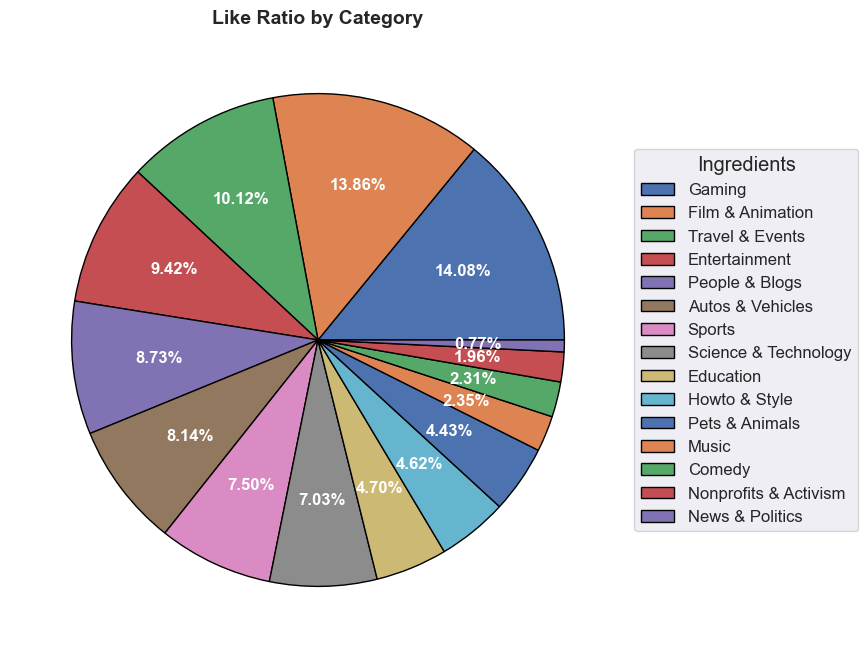

In [37]:
data = Category_Like_Ratio.values
ingredients = Category_Like_Ratio.index

plt.figure(figsize=(8, 8))

def func(pct, allvals):
    return f"{pct:.2f}%"


wedges, texts, autotexts = plt.pie(data, autopct=lambda pct: func(pct, data),
                                   textprops={'fontsize': 12, 'weight': 'bold', 'color': "white"},
                                   pctdistance=0.65,
                                   wedgeprops={"edgecolor": "black", "linewidth": 1});

plt.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12)

plt.title("Like Ratio by Category", fontsize=14, fontweight='bold')

plt.show()

# Perform a visual statistical analysis of video views by year of publication using Box Plot, and this helps to easily detect distribution and deviations.

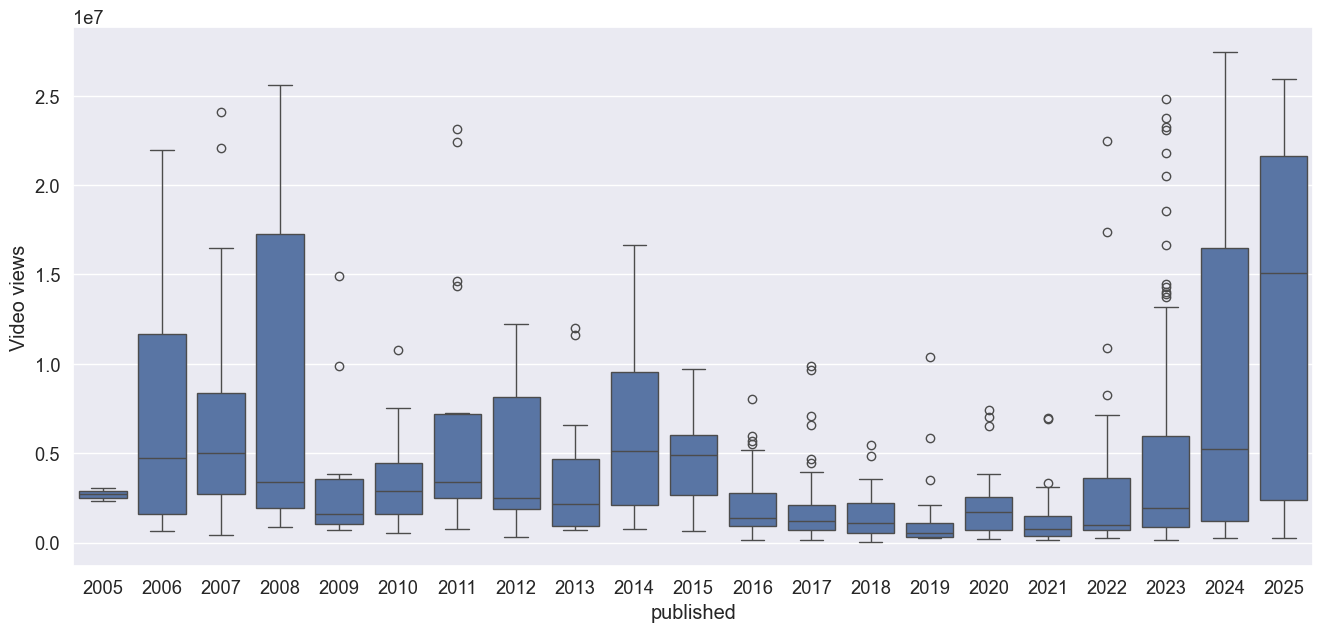

In [43]:
plt.figure(figsize=(16, 7))

sns.boxplot(data=ytb_df_without_outlier, x='published', y='Video views')

plt.show()

# Analyze the evolution of video views on YouTube over the years, and present this in the form of a line plot

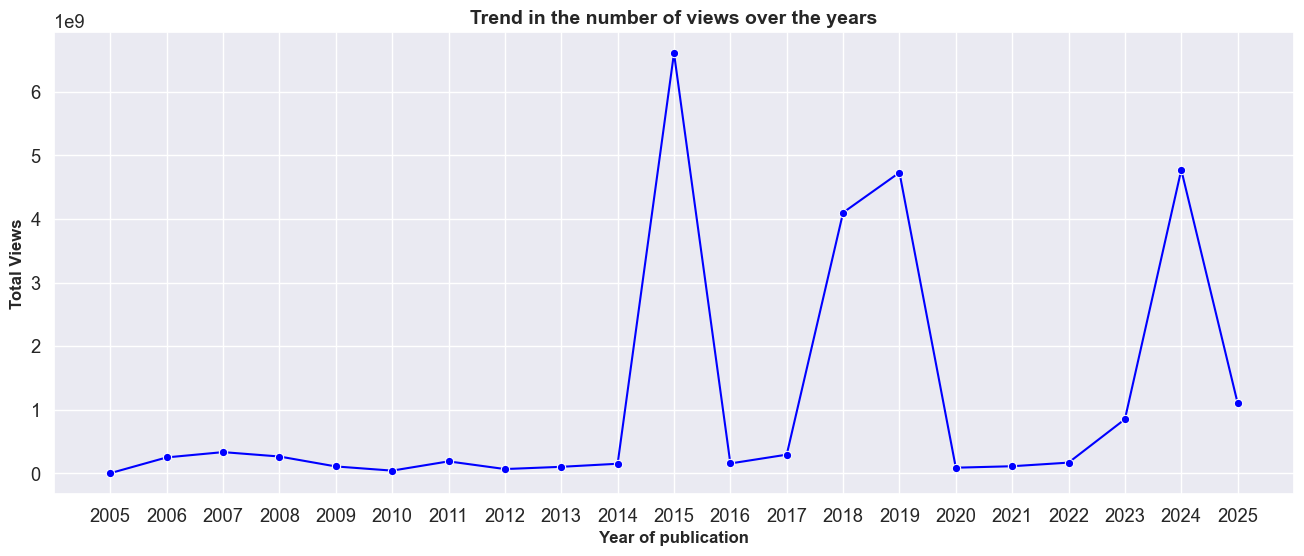

In [44]:
views_per_year = ytb_df.groupby("published")["Video views"].sum()
views_per_year

plt.figure(figsize=(16, 6))
sns.lineplot(x=views_per_year.index, y=views_per_year.values, marker='o', color="blue")

plt.xticks(range(2005, 2026))
plt.xlabel("Year of publication", fontsize=12, fontweight='bold')
plt.ylabel("Total Views", fontsize=12, fontweight='bold')
plt.title("Trend in the number of views over the years", fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

# Thank you for visiting.